In [22]:
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [23]:
class_names = {0:'male', 1:'female'}
race_names = {0:'white', 1:'black', 2:'asian', 3:'indian', 4:'other'}
landmark_specs = {
    'left_eye':([0, 255, 0],'left eye'),
    'right_eye':([0, 255, 0],'right eye'),
    'nose_tip': ([0, 255, 255], 'nose'),
    'left_mouth':([255, 0, 0], 'left_mouth'),
    'right_mouth':([255, 0, 0], 'right_mouth')
    }

filepath = '../data/landmarks_dataset.parquet'
try:
    df = pd.read_parquet(filepath)
except FileNotFoundError:
    print(f'no file found in {filepath}.')
    exit()

In [24]:
def draw_annotations(img, row_data):
    """
    draw anchor and 5 landmarks.
    """
    output_img = img.copy()
    
    if row_data['detection_successful'] and pd.notna(row_data['bbox_x1']): 
        cv.rectangle(
            output_img,
            (int(row_data['bbox_x1']), int(row_data['bbox_y1'])), 
            (int(row_data['bbox_x2']), int(row_data['bbox_y2'])),
            (0, 0, 255),  
            2
        )
    

    for key, (color, name) in landmark_specs.items():
        x_key = f'{key}_x' 
        y_key = f'{key}_y'
        
        if pd.notna(row_data[x_key]): 
            x = int(row_data[x_key])
            y = int(row_data[y_key])
            
            cv.circle(output_img, (x, y), 3, color, -1) 
            
    return output_img

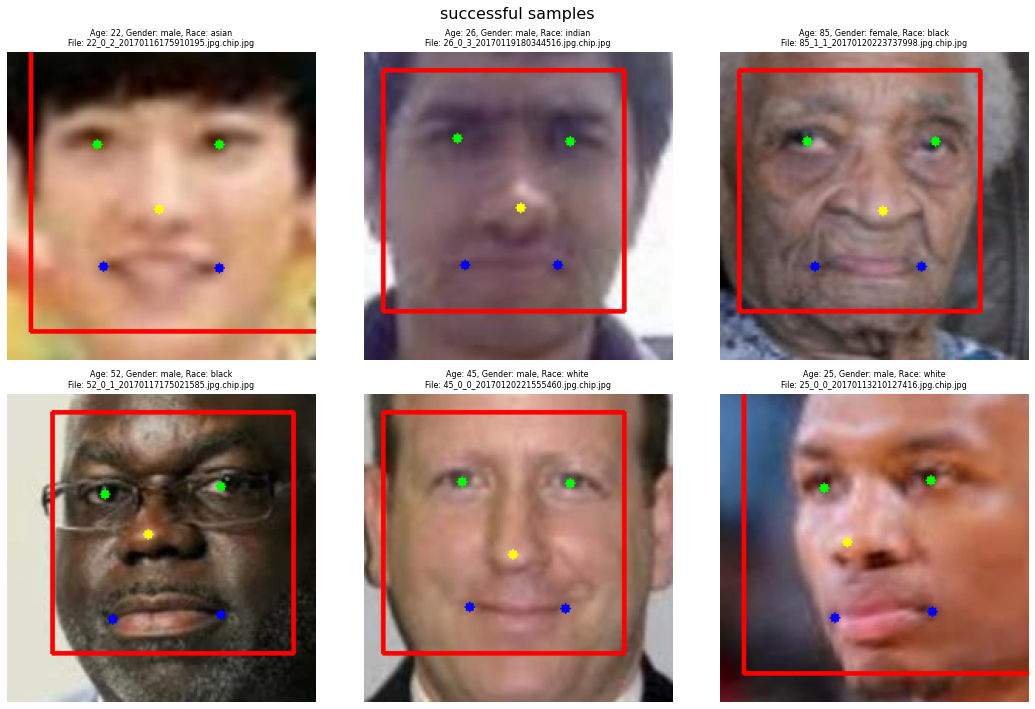

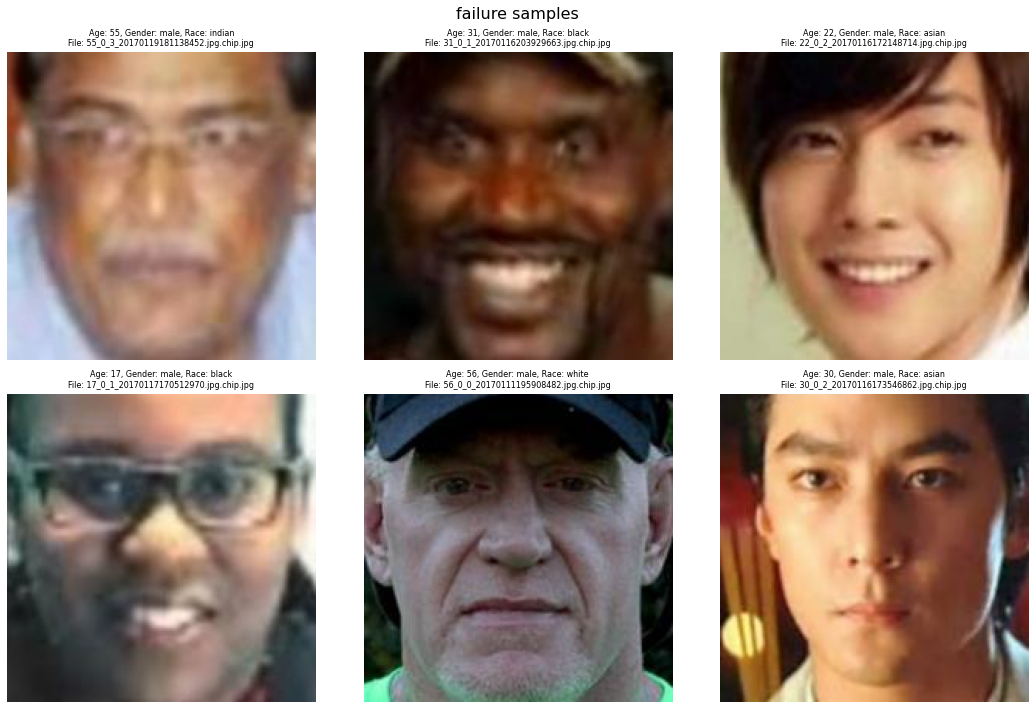

In [25]:
success_samples = df[df['detection_successful'] == True].sample(6) 

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() 
for i, (idx, row) in enumerate(success_samples.iterrows()):

    img = cv.imread(row['filepath'])
    
    annotated_image = draw_annotations(img, row)
    
    annotated_image_rgb = cv.cvtColor(annotated_image, cv.COLOR_BGR2RGB)
    
    title = (
        f"Age: {row['age']}, Gender: {row['gender_label']}, Race: {row['race_label']}\n"
        f"File: {os.path.basename(row['filepath'])}"
    )

    axes[i].imshow(annotated_image_rgb)
    axes[i].set_title(title, fontsize=8)
    axes[i].axis('off')

plt.suptitle("successful samples", fontsize=16)
plt.tight_layout()
plt.savefig("report_C_section_success.jpg")


fail_samples = df[df['detection_successful'] == False]
if not fail_samples.empty:

    num_to_sample = min(6, len(fail_samples))
    fail_samples = fail_samples.sample(num_to_sample)
    
    fig_fail, axes_fail = plt.subplots(2, 3, figsize=(15, 10))
    axes_fail = axes_fail.flatten()
    
    for i, (idx, row) in enumerate(fail_samples.iterrows()):
        img = cv.imread(row['filepath'])
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
        
        title = (
            f"Age: {row['age']}, Gender: {row['gender_label']}, Race: {row['race_label']}\n"
            f"File: {os.path.basename(row['filepath'])}"
        )
        axes_fail[i].imshow(img_rgb)
        axes_fail[i].set_title(title, fontsize=8)
        axes_fail[i].axis('off')
    
    plt.suptitle("failure samples", fontsize=16)
    plt.tight_layout()
    #plt.show()
    plt.savefig("report_C_section_fail.jpg")
